In [1]:
%matplotlib inline

In [94]:
from pathlib import Path
from pandas import DataFrame,Series
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import scipy.stats as stats
import pylab as pl
from random import sample

In [95]:
my_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile.csv")
df = pd.read_csv(my_file)
df.head()
df.shape#(no of rows, no of columns)

(417, 46)

In [117]:
df['color'] = Series([('skyblue' if x == "walking" else 'coral') for x in df['Label']])
df['marker'] = Series([('o' if x == "walking" else 'x') for x in df['Label']])
my_color_map = ListedColormap(['red','green'],'mycolormap')
#0,red,walking
#1,green,running

df_unique = df.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape

(406, 48)

In [118]:
X_train = df_unique.values[:,2:45]

In [119]:
Y_train = df_unique.values[:,45]

In [120]:
test_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile_10.csv")
df_test = pd.read_csv(test_file)
df_test.head()
df_test.shape#(no of rows, no of columns)

(518, 46)

In [121]:
df_test['color'] = Series([(0 if x == "walking" else 1) for x in df_test['Label']])
#0,red,walking
#1,green,running

In [122]:
df_unique_test = df_test.drop_duplicates(subset=['User', 'Timestamp'])
df_unique_test.head()
df_unique_test.shape

(415, 47)

In [123]:
df_gini = DecisionTreeClassifier(criterion = 'gini')

In [124]:
df_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
feature_imp = df_gini.feature_importances_
feature_imp

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.0198219 ,  0.00802372,  0.03028083,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.11739899,  0.00988926,  0.77710611,
        0.        ,  0.00998256,  0.00979727,  0.        ,  0.        ,
        0.        ,  0.01769937,  0.        ])

In [126]:
#Predicting using test data
#taking size of test data 10% of training data
test_small = df_unique_test.iloc[sample(range(len(df_unique_test)), 40), :]
X_test_small = test_small.values[:,2:45]
Y_test_small = test_small.values[:,45]
Y_predict_gini_small = df_gini.predict(X_test_small)

In [127]:
#Calculating accuracy score
score_small = accuracy_score(Y_test_small,Y_predict_gini_small)
score_small

0.67500000000000004

In [128]:
main_features = []
for i in range(0,len(feature_imp)):
    if feature_imp[i] > 0:
        entry = []
        entry.append(df.columns.values[i+2])
        entry.append(feature_imp[i])
        main_features.append(entry)
main_features

[['Bin8,x', 0.0198219005075192],
 ['Bin9,x', 0.0080237154150197606],
 ['Bin10,x', 0.03028083191971187],
 ['TimeDiffPeaks-z', 0.11739898523298128],
 ['AvgAbsDiff-x', 0.009889261814220696],
 ['AvgAbsDiff-y', 0.77710610745347131],
 ['AvgAcc-x', 0.0099825567369964622],
 ['AvgAcc-y', 0.0097972686810651795],
 ['StdDev-z', 0.017699372239014181]]

In [135]:
frame = df_unique.loc[:,['AvgAbsDiff-x','AvgAbsDiff-y','AvgAcc-x','AvgAcc-y','TimeDiffPeaks-x','TimeDiffPeaks-y']]
# TimeDiff-X
# StdDev-x
# TimeDiffPeaks-y
type(my_color_map)
type(df_unique['color'])

pandas.core.series.Series

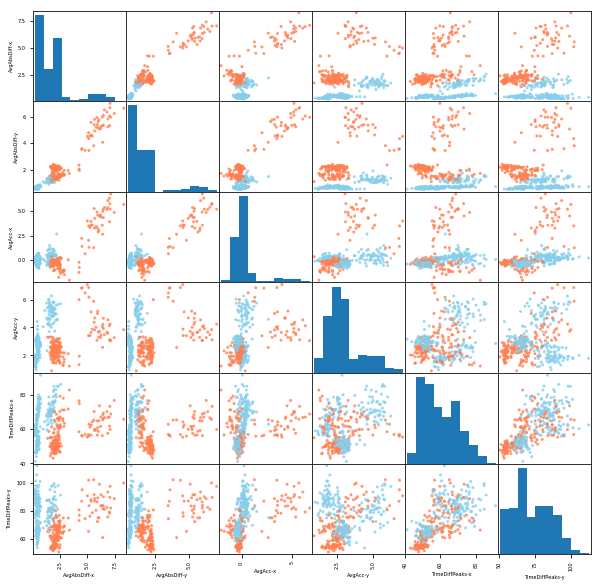

In [147]:
Axes = scatter_matrix(frame,color=df_unique['color'],alpha=0.8,figsize=(10, 10))
#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 5) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 5) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 5) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 5) for item in Axes.ravel()]
plt.savefig('./../Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_val_10_10.png',dpi=1000)